# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/timothywardlow/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [7]:
# Fetch the Bitcoin news articles
BTC_news = newsapi.get_everything(q='bitcoin', language='en')
# Showing the total number of news articles
BTC_news['totalResults']

7291

In [8]:
# Fetch the Ethereum news articles
ETH_news = newsapi.get_everything(q='ethereum', language='en')
# Showing the total number of news articles
ETH_news['totalResults']

3542

In [9]:
# Create the Bitcoin sentiment scores DataFrame
BTC_df = pd.DataFrame.from_dict(BTC_news['articles'])
BTC_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,https://www.theverge.com/2022/3/17/22982122/ru...,https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3...,2022-03-17T13:33:43Z,"When Russia invaded Ukraine, Niki Proshin was ..."
1,"{'id': None, 'name': 'Slashdot.org'}",EditorDavid,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...",https://news.slashdot.org/story/22/03/12/05412...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-03-12T18:34:00Z,"""Bitcoin was seen by many of its libertarian-l..."
2,"{'id': 'reuters', 'name': 'Reuters'}",None,CRYPTOVERSE-Bitcoin could be laid low by miner...,Bitcoin miners are feeling the heat - and the ...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/resizer/9nBpgfg7pSfpPQ...,2022-02-22T06:17:00Z,Feb 22 (Reuters) - Bitcoin miners are feeling ...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/pf/resources/images/re...,2022-03-01T06:10:00Z,March 1 (Reuters) - Bitcoin has leapt since Ru...
4,"{'id': 'wired', 'name': 'Wired'}",Gian M. Volpicelli,War Is Calling Crypto’s ‘Neutrality’ Into Ques...,War in Ukraine and Western sanctions against R...,https://www.wired.com/story/crypto-russia-ukra...,https://media.wired.com/photos/6226a83bd53a49d...,2022-03-08T12:00:00Z,Whose side is cryptocurrency on? If you had as...


In [10]:
# Create the Ethereum sentiment scores DataFrame
ETH_df = pd.DataFrame.from_dict(ETH_news['articles'])
ETH_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Shanti Escalante-De Mattei,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,https://www.wired.com/story/web3-governance-to...,https://media.wired.com/photos/621d66c7ea3b8f2...,2022-03-01T14:00:00Z,"In February, shit hit the fan in the usual way..."
1,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/62190267d0009b001904bd96...,2022-02-25T17:02:30Z,Coinbase reported that the share of trading vo...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
3,"{'id': 'wired', 'name': 'Wired'}",Omar L. Gallaga,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,https://www.wired.com/story/how-to-make-money-...,https://media.wired.com/photos/622bcc6ef48a924...,2022-03-13T13:00:00Z,"If it sounds too good to be true, youre not wr..."
4,"{'id': None, 'name': 'Entrepreneur'}",Masha Prusso,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,https://www.entrepreneur.com/article/417850,https://assets.entrepreneur.com/content/3x2/20...,2022-03-03T16:00:00Z,"It seems that in 2022, you cant escape from th..."


In [29]:
# Creating a function with all the results to transform the articles list into a data frame
def create_sentiment_df(articles_list):
    sentiments = []
    
    # Creating a for loop to iterate across the articles list to fetch and filter data
    for article in articles_list['articles']:
        try:
            text = article['content']
            date = article['publishedAt'][:10]
            sentiment = SentimentIntensityAnalyzer().polarity_scores(text)
            compound = sentiment['compound']
            neu = sentiment['neu']
            pos = sentiment['pos']
            neg = sentiment['neg']
            
            sentiments.append({
                'text' : text,
                'date' : date, 
                'compound' : compound,
                'neutral' : neu,
                'negative' : neg,
                'positive' : pos
            })
        except AttributeError:
            pass
    df = pd.DataFrame(sentiments)
    return df

In [31]:
# Checking BTC data frame
BTC_sentiment_df = create_sentiment_df(BTC_news)
BTC_sentiment_df.head()

,text,date,compound,neutral,negative,positive
0,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,0.0000,1.000,0.000,0.000
1,"""Bitcoin was seen by many of its libertarian-l...",2022-03-12,-0.7713,0.831,0.169,0.000
2,Feb 22 (Reuters) - Bitcoin miners are feeling ...,2022-02-22,-0.1779,0.887,0.067,0.046
3,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01,0.0000,1.000,0.000,0.000
4,Whose side is cryptocurrency on? If you had as...,2022-03-08,-0.3182,0.854,0.091,0.055


In [32]:
# Describe the Bitcoin Sentiment
BTC_sentiment_df.describe()

,compound,neutral,negative,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.001295,0.908500,0.043750,0.047700
std,0.406381,0.071992,0.061198,0.045767
min,-0.771300,0.739000,0.000000,0.000000
25%,-0.231275,0.861500,0.000000,0.000000
50%,0.000000,0.918000,0.000000,0.051500
75%,0.345300,0.952500,0.071000,0.075750
max,0.636900,1.000000,0.187000,0.152000


In [33]:
# Checking ETH data frame
ETH_sentiment_df = create_sentiment_df(ETH_news)
ETH_sentiment_df.head()

,text,date,compound,neutral,negative,positive
0,"In February, shit hit the fan in the usual way...",2022-03-01,-0.3182,0.848,0.093,0.059
1,Coinbase reported that the share of trading vo...,2022-02-25,0.6705,0.812,0.000,0.188
2,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,-0.4588,0.917,0.083,0.000
3,"If it sounds too good to be true, youre not wr...",2022-03-13,0.8340,0.713,0.050,0.236
4,"It seems that in 2022, you cant escape from th...",2022-03-03,-0.1326,0.956,0.044,0.000


In [34]:
# Describe the Ethereum Sentiment
ETH_sentiment_df.describe()

,compound,neutral,negative,positive
count,20.000000,20.00000,20.00000,20.000000
mean,0.190925,0.89145,0.02975,0.078750
std,0.401422,0.10092,0.04006,0.085383
min,-0.526700,0.69200,0.00000,0.000000
25%,0.000000,0.84100,0.00000,0.000000
50%,0.025800,0.91050,0.00000,0.066500
75%,0.514625,1.00000,0.06125,0.120500
max,0.834000,1.00000,0.11500,0.249000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had the higher mean positive score, 0.078750. BTC had a mean positive score of 0.047700.

Q: Which coin had the highest compound score?

A: ETH had the highest compound score at 0.834000. BTC's highest compound score was 0.636900.

Q. Which coin had the highest positive score?

A: ETH also had the highest positive score, 0.249000. BTC's highest positive score was 0.152000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [36]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
stop_words = stop_words.union({'reuters', 'com', 'char', 'ha', 'illustration', 'past'})

In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    text = text.translate(str.maketrans('', '', punctuation))
   
    # Create a tokenized list of the words
    tokens_re = word_tokenize(text)
    
    # Lemmatize words into root words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_re]
   
    # Convert the words to lowercase
    tokens = [token.lower() for token in lemmatized_tokens if token.lower() not in stop_words]
    
    
    return tokens

In [40]:
# Create a new tokens column for Bitcoin
def addTokensColumn(df_tokens_column):
    
    df = df_tokens_column.copy()
    
    # Creating the column 
    df['tokens'] = df.apply(lambda row: (tokenizer(row.text)), axis=1)
    cols = ['date', 'text', 'tokens', 'compound', 'positive', 'negative', 'neutral']
    df = df[cols]
    
    return df 

In [41]:
BTC_sentiment_df = addTokensColumn(BTC_sentiment_df)
BTC_sentiment_df.head()

,date,text,tokens,compound,positive,negative,neutral
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...","[russia, invaded, ukraine, niki, proshin, wa, ...",0.0000,0.000,0.000,1.000
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...","[bitcoin, wa, seen, many, libertarianleaning, ...",-0.7713,0.000,0.169,0.831
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,"[feb, 22, bitcoin, miner, feeling, heat, pain,...",-0.1779,0.046,0.067,0.887
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,"[march, 1, bitcoin, leapt, since, russias, inv...",0.0000,0.000,0.000,1.000
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,"[whose, side, cryptocurrency, asked, satoshi, ...",-0.3182,0.055,0.091,0.854


In [42]:
# Create a new tokens column for Ethereum
ETH_sentiment_df = addTokensColumn(ETH_sentiment_df)
ETH_sentiment_df.head()

,date,text,tokens,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...","[february, shit, hit, fan, usual, way, old, tw...",-0.3182,0.059,0.093,0.848
1,2022-02-25,Coinbase reported that the share of trading vo...,"[coinbase, reported, share, trading, volume, e...",0.6705,0.188,0.000,0.812
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,"[james, bareham, verge, 15, million, donated, ...",-0.4588,0.000,0.083,0.917
3,2022-03-13,"If it sounds too good to be true, youre not wr...","[sound, good, true, youre, wrong, yield, farmi...",0.8340,0.236,0.050,0.713
4,2022-03-03,"It seems that in 2022, you cant escape from th...","[seems, 2022, cant, escape, metaverse, faceboo...",-0.1326,0.000,0.044,0.956


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [43]:
from collections import Counter
from nltk import ngrams

In [44]:
# Generate the Bitcoin N-grams where N=2
BTC_tokens = BTC_sentiment_df['tokens'].sum()
BTC_ngrams_n2 = Counter(ngrams(BTC_tokens, n=2))

print(dict(BTC_ngrams_n2))

{('russia', 'invaded'): 2, ('invaded', 'ukraine'): 2, ('ukraine', 'niki'): 1, ('niki', 'proshin'): 1, ('proshin', 'wa'): 1, ('wa', 'already'): 1, ('already', 'year'): 1, ('year', 'making'): 1, ('making', 'living'): 1, ('living', 'vlogger'): 1, ('vlogger', '—'): 1, ('—', 'youtube'): 1, ('youtube', 'channel'): 1, ('channel', 'tiktok'): 1, ('tiktok', 'channel'): 1, ('channel', 'instagram'): 1, ('instagram', 'also'): 1, ('also', 'ran'): 1, ('ran', 'online'): 1, ('online', 'russian'): 1, ('russian', 'club'): 1, ('club', 'a…'): 1, ('a…', '5883'): 1, ('5883', 'bitcoin'): 1, ('bitcoin', 'wa'): 1, ('wa', 'seen'): 1, ('seen', 'many'): 1, ('many', 'libertarianleaning'): 1, ('libertarianleaning', 'fan'): 1, ('fan', 'kind'): 1, ('kind', 'doomsday'): 1, ('doomsday', 'insurance'): 1, ('insurance', 'argues'): 1, ('argues', 'columnist'): 1, ('columnist', 'new'): 1, ('new', 'york'): 1, ('york', 'times'): 1, ('times', 'form'): 1, ('form', 'digital'): 1, ('digital', 'gold'): 1, ('gold', 'would'): 1, ('wou

In [45]:
# Generate the Ethereum N-grams where N=2
ETH_tokens = ETH_sentiment_df['tokens'].sum()
ETH_ngrams_n2 = Counter(ngrams(ETH_tokens, n=2))

print(dict(ETH_ngrams_n2))

{('february', 'shit'): 1, ('shit', 'hit'): 1, ('hit', 'fan'): 1, ('fan', 'usual'): 1, ('usual', 'way'): 1, ('way', 'old'): 1, ('old', 'tweet'): 1, ('tweet', 'resurfaced'): 1, ('resurfaced', 'brantly'): 1, ('brantly', 'millegan'): 1, ('millegan', 'director'): 1, ('director', 'operation'): 1, ('operation', 'ethereum'): 1, ('ethereum', 'name'): 1, ('name', 'service'): 1, ('service', 'ens'): 1, ('ens', 'web3'): 1, ('web3', 'business'): 1, ('business', 'written'): 1, ('written', 'following'): 1, ('following', 'may'): 1, ('may', '201…'): 1, ('201…', '3096'): 1, ('3096', 'coinbase'): 1, ('coinbase', 'reported'): 1, ('reported', 'share'): 1, ('share', 'trading'): 1, ('trading', 'volume'): 2, ('volume', 'ethereum'): 1, ('ethereum', 'altcoins'): 1, ('altcoins', 'increased'): 1, ('increased', 'last'): 1, ('last', 'year'): 1, ('year', 'bitcoins'): 1, ('bitcoins', 'share'): 1, ('share', 'dropped'): 1, ('dropped', 'dramatically'): 1, ('dramatically', '2020'): 1, ('2020', '2021'): 1, ('2021', 'ethere

In [46]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [47]:
# Use token_count to get the top 10 words for Bitcoin
BTC_top_ten_words = token_count(BTC_tokens, 10)
BTC_top_ten_words

[('bitcoin', 13),
 ('russia', 5),
 ('ukraine', 5),
 ('march', 5),
 ('crypto', 5),
 ('…', 4),
 ('week', 4),
 ('15', 4),
 ('salvador', 4),
 ('wa', 3)]

In [48]:
# Use token_count to get the top 10 words for Ethereum
ETH_top_ten_words = token_count(ETH_tokens, 10)
ETH_top_ten_words

[('ethereum', 6),
 ('volume', 5),
 ('million', 5),
 ('cryptocurrency', 5),
 ('hit', 4),
 ('year', 4),
 ('…', 4),
 ('billion', 4),
 ('blockchain', 4),
 ('service', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

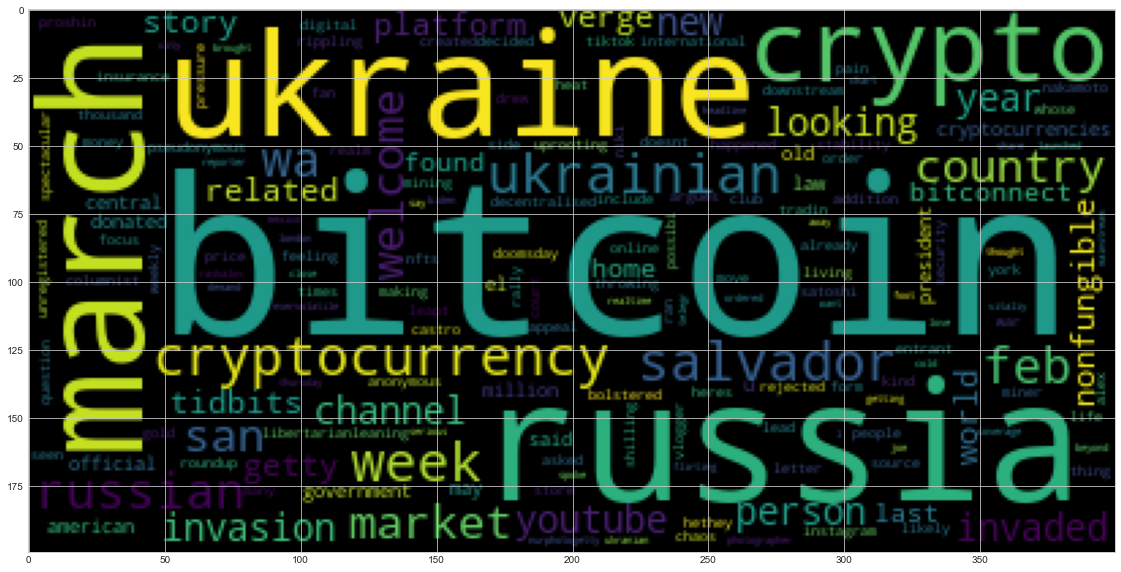

In [50]:
# Generate the Bitcoin word cloud
BTC_wc = ' '.join(BTC_tokens)
wc = WordCloud().generate(BTC_wc)
plt.imshow(wc)

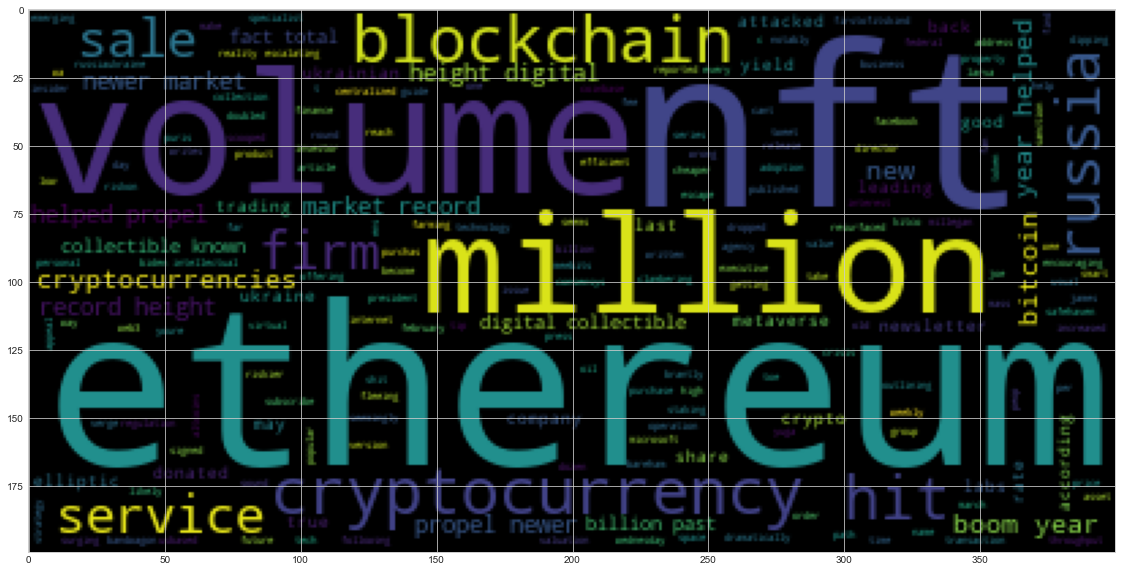

In [51]:
# Generate the Ethereum word cloud
ETH_words = ' '.join(ETH_tokens)
wc = WordCloud().generate(ETH_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [52]:
import spacy
from spacy import displacy

In [53]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 1.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
BTC_concat_tokens_text = BTC_sentiment_df['text'].sum()
BTC_concat_tokens_text

'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]"Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form of \'digital gold\' that would be a source of stability as … [+3914 chars]Feb 22 (Reuters) - Bitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices.\r\nThe cryptocurrency\'s spectacular rally in 2021 drew thousands of entrants into mining,… [+4196 chars]March 1 (Reuters) - Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and move money in anonymous and decentralised crypto.\r\nBitcoin tradin… [+3955 chars]Whose side is cryptocurrency on? If you had asked Satoshi Nakamoto, the pseudonymous person (or persons) who created the Bitcoin platf

In [56]:
# Run the NER processor on all of the text
all_BTC_text = nlp(BTC_concat_tokens_text)
displacy.render(all_BTC_text, style='ent')

# Add a title to the document
all_BTC_text.user_data['title'] = 'Bitcoin NER'

In [57]:
# Render the visualization
displacy.render(all_BTC_text, style='ent')

In [59]:
# List all Entities
for ent in all_BTC_text.ents:
    print(f'{ent.text} | {ent.label_}')

Russia | GPE
Ukraine | GPE
Niki Proshin | PERSON
a year | DATE
YouTube | ORG
TikTok | ORG
Instagram | ORG
Russian | NORP
the New York Times | ORG
22 | CARDINAL
Reuters | ORG
2021 | DATE
thousands | CARDINAL
Reuters | ORG
Russia | GPE
Ukraine | GPE
Satoshi Nakamoto | PERSON
2008 | DATE
Nonfungible Tidbits | PERSON
this week | DATE
Russia | GPE
Ukraine | GPE
Ukrainians | NORP
Russian | NORP
+3275 | ORG
this week | DATE
Getty
Welcome to | ORG
Nonfungible Tidbits | PERSON
weekly | DATE
this week | DATE
YouTube | ORG
Alex Castro | PERSON
Verge | ORG
BitConnect | ORG
Getty | GPE
Russia | GPE
last Thursday | DATE
Ukranian | NORP
Mexico City | GPE
Telegr | ORG
March 4 | DATE
Reuters | ORG
Russia | GPE
Ukraine | GPE
Russia | GPE
15 | CARDINAL
Reuters | ORG
U.S. | GPE
Joe Biden | PERSON
Reuters | ORG
BITCOIN | PERSON
+6882 chars]<ul><li> | ORG
Summary</li><li> | WORK_OF_ART
Law firms</li><li>
 | PERSON
documents</li></ul | GPE
Ukrainian | NORP
Tom Lee | PERSON
Ukraine | GPE
March 11 | DATE
Reute

---

### Ethereum NER

In [61]:
# Concatenate all of the Ethereum text together
ETH_concat_tokens_text = ETH_sentiment_df['text'].sum()
ETH_concat_tokens_text

"In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin's share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars]Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in cryptocurrency has been donated to Ukrainian groups since Russia attacked the c… [+7442 chars]If it sounds too good to be true, youre not wrong. Yield farming is riskier than staking. The tokens that are offering such high interest rates and fee yields are also the ones most likely to take a … [+2371 chars]It seems that in 2022, you cant escape from the metaverse.\xa0From Facebook to Microsoft, seemingly every centralized tech firm is c

In [62]:
# Run the NER processor on all of the text
all_ETH_text = nlp(ETH_concat_tokens_text)
displacy.render(all_ETH_text, style='ent')

# Add a title to the document
all_ETH_text.user_data['title'] = 'Ethereum NER'

In [63]:
# Render the visualization
displacy.render(all_ETH_text, style='ent')

In [64]:
# List all Entities
for ent in all_ETH_text.ents:
    print(f'{ent.text} | {ent.label_}')

February | DATE
Ethereum Name Service | ORG
ENS | ORG
May 201 | DATE
last year | DATE
Between 2020 and 2021 | DATE
James Bareham | PERSON
More than $15 million | MONEY
More than $15 million | MONEY
Ukrainian | GPE
Russia | GPE
2022 | DATE
Facebook | ORG
Microsoft | ORG
the past few years | DATE
NFT | ORG
$23 billion | MONEY
TIME | ORG
weekly | DATE
Biden | PERSON
Wednesday | DATE
first | ORDINAL
the past few years | DATE
NFT | ORG
$23 billion | MONEY
the past few years | DATE
NFT | ORG
$23 billion | MONEY
Ethereum | ORG
$450 million | MONEY
Series | EVENT
US | GPE
over $7 billion | MONEY
Russia | GPE
Ukraine | GPE
days | DATE
March 11 | DATE
Yuga Labs | PERSON
Meebits | NORP
Larva Labs | PERSON
more than a dozen | CARDINAL
Ethereum | ORG
American Express | ORG
Tuesday | DATE
Ukrainian | NORP
more than $4 million | MONEY
Russia | GPE
Elliptic | LOC
Ukraine | GPE
Russia | GPE
Elliptic | PRODUCT
nearly $55 million | MONEY
Russia | GPE
Ukraine | GPE
Bloomberg | GPE
Getty Images | GPE
Bitco

---